# Exercise

- Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

#### Pre Modeling

##### Imports

In [24]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_titanic_data, split_data

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

##### Acquire Data

In [25]:
titanic = get_titanic_data()

##### Surface Level Information

In [26]:
# Done before

# size
# shape
# dtypes
# agg math

##### Prepare Data

In [27]:
# Changing frequently, copy/pasting rather than importing

def prep_titanic(df):
    '''
    This function will drop any duplicate observations, 
    drop ['deck', 'embarked', 'class', 'age'], fill missing embark_town with 'Southampton'
    and create dummy vars from sex and embark_town. 
    '''
    df = df.drop_duplicates()
    dummy_df = pd.get_dummies(df['sex'], drop_first=True, dtype='int')
    df = pd.concat([df, dummy_df], axis=1)
    df['embark_town'] = df['embark_town'].fillna(value='Southampton')
    dummy_df = pd.get_dummies(df['embark_town'], drop_first=False, dtype='int')
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(columns=['pclass', 'deck', 'embarked', 'class', 'age', 'sex', 'embark_town', 'passenger_id'])

    return df

titanic = prep_titanic(titanic)

##### Split Data

In [28]:
train, validate, test = split_data(titanic, 'survived')

train: 498 (56.00000000000001% of 891)
validate: 214 (24.0% of 891)
test: 179 (20.0% of 891)


##### Deeper Explore / Viz on train data

In [29]:
# Done before

# graphs for numerical
# graphs for categorical
# find best attributes for finding our target

##### X / Y Splits

In [30]:
# Create X & y version of train, validate, test where y is a series with just the target variable and X are all the features. 

# We'll do exploration and train our model on the train data
X_train = train.drop(columns=['survived'])
y_train = train['survived']

# We tune our model on validate, since it will be out-of-sample until we use it. 
X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=['survived'])
y_test = test['survived']

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [31]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

y_pred_proba = knn.predict_proba(X_train)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.




best_dtc_features = ['total_charges', 'monthly_charges', 'fiber_optic_internet']

best_dtc = DecisionTreeClassifier(max_depth=4, random_state=123)

best_dtc.fit(X_train[features], y_train)

y_pred = best_dtc.predict(X_train[features])

y_pred_proba = best_dtc.predict_proba(X_train[features])




print('Accuracy of DTC classifier on training set:', (knn.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

disp.plot()
plt.show()



tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp

print('DTC Report')
print('------------------------')

accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy of KNN classifier on training set: 0.8132530120481928
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



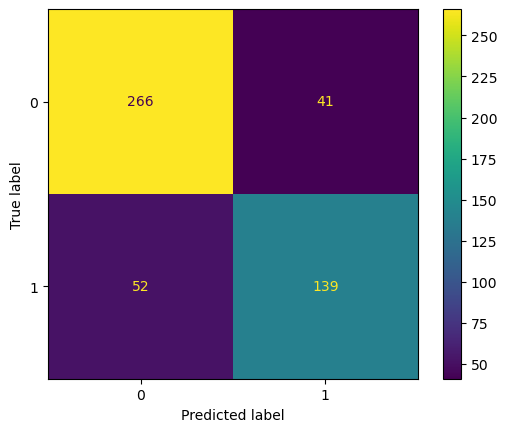

In [46]:
print('Accuracy of KNN classifier on training set:', (knn.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

disp.plot()
plt.show()

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [38]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp

accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.8132530120481928
True Positive Rate: 0.7277486910994765
False Positive Rate: 0.13355048859934854
True Negative Rate: 0.8664495114006515
False Negative Rate: 0.27225130890052357
Precision: 0.7722222222222223
Recall: 0.7277486910994765
F1 Score: 0.7493261455525607
Support (0): 191
Support (1): 307


In [ ]:
### Predictions

best_knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set:', (knn.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)

disp.plot()
plt.show()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp

accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

### 4. Run through steps 1-3 setting k to 10



##### 4.1 Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [39]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

knn10.fit(X_train, y_train)

y_pred10 = knn10.predict(X_train)

y_pred_proba10 = knn10.predict_proba(X_train)

##### 4.2 Evaluate your results using the model score, confusion matrix, and classification report.



Accuracy of KNN classifier on training set: 0.7791164658634538
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



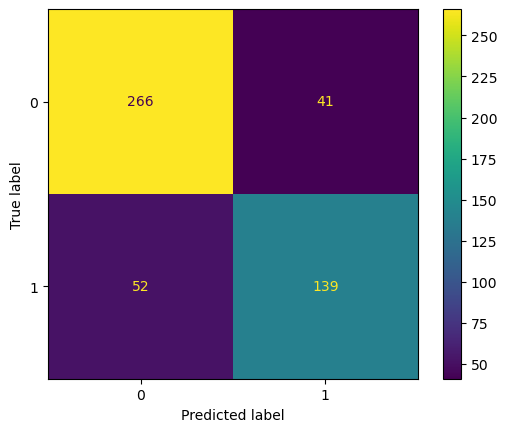

In [40]:
print('Accuracy of KNN classifier on training set:', (knn10.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

cm10 = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(cm10, display_labels=knn10.classes_)

disp.plot()
plt.show()

##### 4.3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [41]:
tp, fp, fn, tp = cm10.ravel()
all = tp + fp + fn + tp

accuracy = (tp + tp)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tp)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tp/(tp+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tp
print(f"Support (1): {support_neg}")

Accuracy: 0.7493261455525606
True Positive Rate: 0.7277486910994765
False Positive Rate: 0.22777777777777777
True Negative Rate: 0.7722222222222223
False Negative Rate: 0.27225130890052357
Precision: 0.7722222222222223
Recall: 0.7277486910994765
F1 Score: 0.7493261455525607
Support (0): 191
Support (1): 180


### 5. Run through steps 1-3 setting k to 20

#### 5.1 Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [42]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

knn20.fit(X_train, y_train)

y_pred10 = knn20.predict(X_train)

y_pred_proba10 = knn20.predict_proba(X_train)

#### 5.2 Evaluate your results using the model score, confusion matrix, and classification report.



Accuracy of KNN classifier on training set: 0.71
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



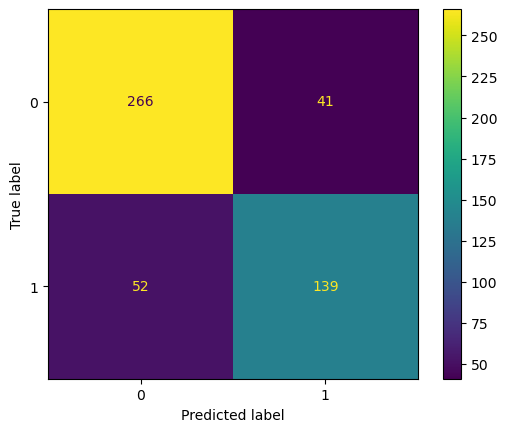

In [43]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

cm20 = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(cm20, display_labels=knn20.classes_)

disp.plot()
plt.show()

#### 5.3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [44]:
tp, fp, fn, tp = cm20.ravel()
all = tp + fp + fn + tp

accuracy = (tp + tp)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tp)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tp/(tp+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tp
print(f"Support (1): {support_neg}")

Accuracy: 0.7493261455525606
True Positive Rate: 0.7277486910994765
False Positive Rate: 0.22777777777777777
True Negative Rate: 0.7722222222222223
False Negative Rate: 0.27225130890052357
Precision: 0.7722222222222223
Recall: 0.7277486910994765
F1 Score: 0.7493261455525607
Support (0): 191
Support (1): 180


### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [47]:
# Smaller numbers for k are able to capture details within the training set, but carry a risk for overfitting.

### 7. Which model performs best on our out-of-sample data from validate?

In [50]:
models_acc = []

for x in range(1,31):

    # Make It
    knn = KNeighborsClassifier(n_neighbors=x)

    # Fit It
    knn = knn.fit(X_train, y_train)
    
    # Score It
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [51]:
# Show It

df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy', 'validate_accuracy'])

df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.879518,0.691589
1,2,0.835341,0.714953
2,3,0.849398,0.742991
3,4,0.821285,0.728972
4,5,0.813253,0.724299
5,6,0.799197,0.696262
6,7,0.793173,0.710280
7,8,0.785141,0.714953
8,9,0.791165,0.724299
9,10,0.779116,0.714953


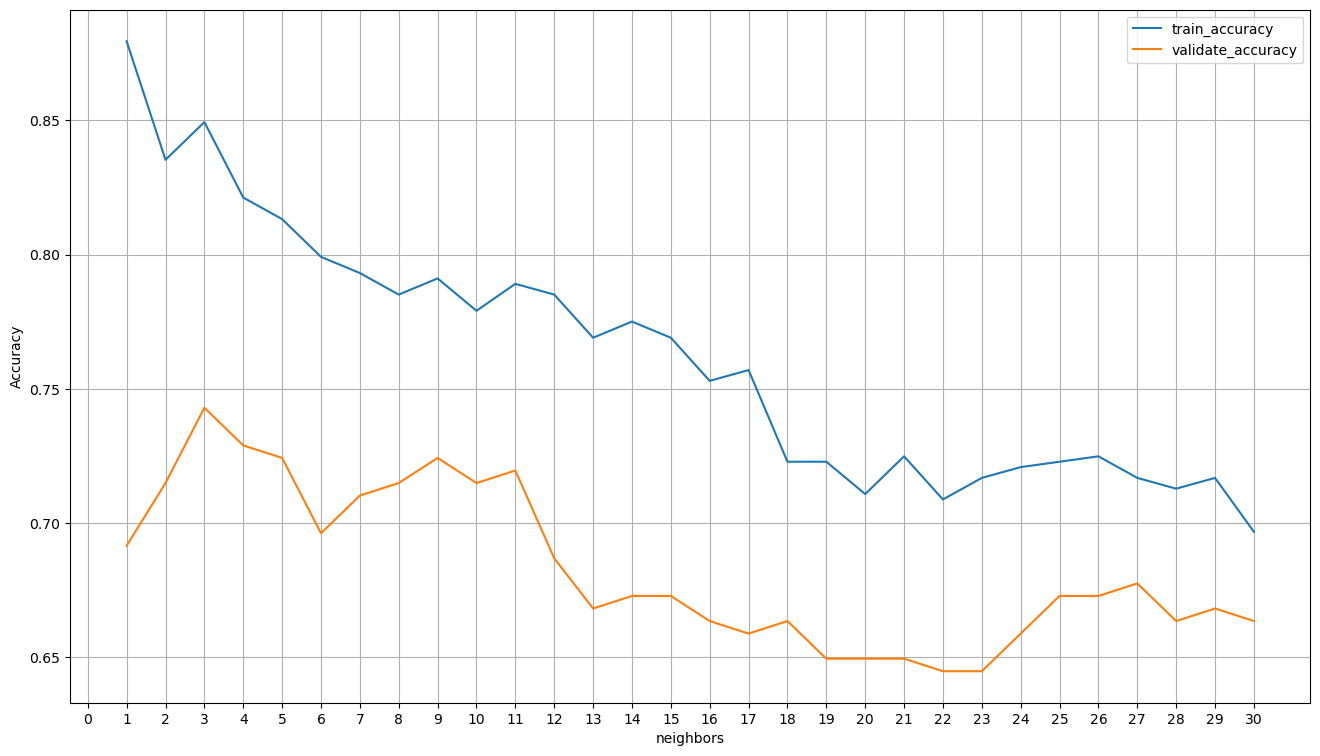

In [52]:
# Graph It

df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

In [ ]:
# Three nieghbors gives the highest validate accuracy

# Notes

### Imports

```python
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data

### Data



```python
# read Iris data from pydatset
df = data('iris')

### Clean



```python
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()



### Train Validate Test



```python
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

### Split (X / Y)



```python
# split into train, validate, test

train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

### Train Model



##### Create Object



```python
# weights = ['uniform', 'distance']

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

##### Fit the model



```python
knn.fit(X_train, y_train)

##### Predications



```python
y_pred = knn.predict(X_train)

##### Estimate



```python

y_pred_proba = knn.predict_proba(X_train)

### Evaluate



##### Accuracy

```python
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

##### Confusion Matrix



```python
print(confusion_matrix(y_train, y_pred))

##### Classification Report


```python
print(classification_report(y_train, y_pred))

# first_nearest_neighbor
import pandas as pd

samples = pd.DataFrame({'a': [5.7, 5.5, 6.3], 
                        'b': [2.6, 3.5, 2.8], 
                        'c': [3.5, 1.3, 5.1], 
                        'd': [1.0, 0.2, 1.5], 
                        'target': ['versicolor', 'setosa', 'virginica']
                       })


samples

new_obs = pd.DataFrame([[6.3, 2.8, 5.1, 1.4], 
                       [6.25, 2.77, 5.09, 1.35], 
                       [5.5, 3.5, 1.29, 0.3]], 
                        columns = ['a', 'b', 'c', 'd'])

new_obs

pred_target = pd.DataFrame(['virginica', 'virginica', 'setosa'], columns=['pred_target'])
pd.concat([new_obs, pred_target], axis=1)

### Validate



##### Out of Sample Data



```python
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

### Visualize Model 



```python
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

# .